In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"elenagomezb","key":"e6b48cd32b6a81ea30ea807852551799"}'}

# Datos

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Test**

In [ ]:
! kaggle datasets download -d elenagomezb/tes-entero

100% 996M/998M [00:57<00:00, 14.8MB/s]
100% 998M/998M [00:57<00:00, 18.3MB/s]


In [ ]:
!mkdir "/content/test"

In [ ]:
!unzip -qq tes-entero.zip -d "/content/test"

**Validación**

In [ ]:
! kaggle datasets download -d elenagomezb/val-entero

100% 996M/997M [01:02<00:00, 15.9MB/s]
100% 997M/997M [01:02<00:00, 16.6MB/s]


In [ ]:
!mkdir "/content/val"

In [ ]:
!unzip -qq val-entero.zip -d "/content/val"

**Entrenamiento**

In [ ]:
! kaggle datasets download -d elenagomezb/train-entero

100% 4.54G/4.54G [04:43<00:00, 13.9MB/s]
100% 4.54G/4.54G [04:43<00:00, 17.2MB/s]


In [ ]:
!mkdir "/content/train"

In [ ]:
!unzip -qq train-entero.zip -d "/content/train"

In [ ]:
import os

In [ ]:
# Ruta del directorio
ruta_directorio = "/content/train"
ruta_directorio2 = "/content/val"
ruta_directorio3 = "/content/test"

# Obtener lista de elementos en el directorio
elementos = os.listdir(ruta_directorio)
elementos2 = os.listdir(ruta_directorio2)
elementos3 = os.listdir(ruta_directorio3)

# Contar número de elementos
num_elementos = len(elementos)
num_elementos2 = len(elementos2)
num_elementos3 = len(elementos3)

print(f"Hay {num_elementos} elementos en el directorio {ruta_directorio}")
print(f"Hay {num_elementos2} elementos en el directorio {ruta_directorio2}")
print(f"Hay {num_elementos3} elementos en el directorio {ruta_directorio3}")

Hay 38294 elementos en el directorio /content/train
Hay 8207 elementos en el directorio /content/val
Hay 8205 elementos en el directorio /content/test


**Datos csv**

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

csv_path = '/content/Datos_Breast_Cancer.csv'
df = pd.read_csv(csv_path)
df.head(10)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,image_zip
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,10006_462822612.png
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,10006_1459541791.png
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False,10006_1864590858.png
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False,10006_1874946579.png
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True,10011_220375232.png
5,2,10011,270344397,L,MLO,55.0,0,0,0,0.0,0,NaN,21,True,10011_270344397.png
6,2,10011,541722628,R,CC,55.0,0,0,0,NaN,0,NaN,21,False,10011_541722628.png
7,2,10011,1031443799,R,MLO,55.0,0,0,0,NaN,0,NaN,21,False,10011_1031443799.png
8,2,10025,562340703,L,CC,75.0,0,0,0,NaN,0,NaN,29,False,10025_562340703.png
9,2,10025,1365269360,L,MLO,75.0,0,0,0,NaN,0,NaN,29,False,10025_1365269360.png


(512, 512)


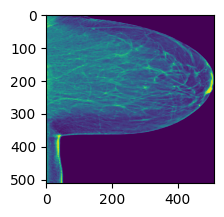

(512, 512)


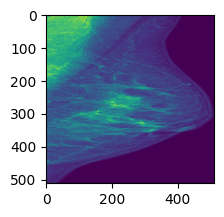

(512, 512)


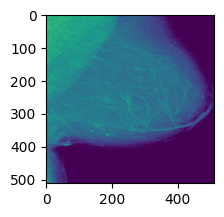

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Ruta del directorio donde se encuentran las imágenes
path = '/content/train'

# Obtener la lista de archivos en el directorio
files = os.listdir(path)
files_prueba = files[:3]

# Mostrar cada imagen en una figura de matplotlib
for file in files_prueba:
    img_path = os.path.join(path, file)
    img = Image.open(img_path)
    plt.subplot(2,2,2)
    print(img.size)
    plt.imshow(img)
    plt.show()

# GENERADORES

In [ ]:
df['cancer'] = df['cancer'].astype(str)

In [ ]:
# crear un objeto ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# crear generador de imágenes y etiquetas
generador = datagen.flow_from_dataframe(
    dataframe=df,                           # dataframe con las etiquetas
    directory="/content/train",             # carpeta con las imágenes
    x_col="image_zip",                      # columna del dataframe con los nombres de las imágenes
    y_col="cancer",                         # columna del dataframe con las etiquetas
    target_size=(180, 180),                 # tamaño de las imágenes
    class_mode="binary",                    # tipo de etiquetas
    batch_size= 512,                        # tamaño del lote (batch)
    smart_resize = True
)



Found 38294 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 16412 invalid image filename(s) in x_col="image_zip". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
from collections import Counter

# Obtener las etiquetas de las imágenes
labels = generador.classes

# Contar la cantidad de imágenes por clase
num_images_per_class = Counter(labels)

# Imprimir la cantidad de imágenes por clase
for class_name, count in num_images_per_class.items():
    print(f"Clase '{class_name}': {count} imágenes")



Clase '0': 37483 imágenes
Clase '1': 811 imágenes


(180, 180, 3)


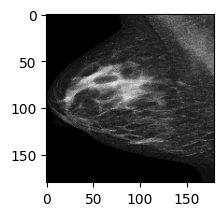

In [ ]:
import matplotlib.pyplot as plt
# Obtener un lote de imágenes del generador
x_batch, y_batch = generador.next()
# Acceder a la primera imagen del lote
image = x_batch[0]
# Visualizar la imagen
plt.subplot(2,2,2)
plt.imshow(image)
print(image.shape)
plt.show()


In [ ]:
# crear un objeto ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# crear generador de imágenes y etiquetas
generador_val = datagen.flow_from_dataframe(
    dataframe=df,                           # dataframe con las etiquetas
    directory="/content/val",               # carpeta con las imágenes
    x_col="image_zip",                      # columna del dataframe con los nombres de las imágenes
    y_col="cancer",                         # columna del dataframe con las etiquetas
    target_size=(180, 180),                 # tamaño de las imágenes
    class_mode="binary",                    # tipo de etiquetas
    batch_size= 512,                        # tamaño del lote (batch)
    smart_resize = True
)

Found 8207 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 46499 invalid image filename(s) in x_col="image_zip". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
from collections import Counter

# Obtener las etiquetas de las imágenes
labels = generador_val.classes

# Contar la cantidad de imágenes por clase
num_images_per_class = Counter(labels)

# Imprimir la cantidad de imágenes por clase
for class_name, count in num_images_per_class.items():
    print(f"Clase '{class_name}': {count} imágenes")


Clase '0': 8033 imágenes
Clase '1': 174 imágenes


In [ ]:
# crear un objeto ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# crear generador de imágenes y etiquetas
generador_test = datagen.flow_from_dataframe(
    dataframe=df,                           # dataframe con las etiquetas
    directory="/content/test",             # carpeta con las imágenes
    x_col="image_zip",                      # columna del dataframe con los nombres de las imágenes
    y_col="cancer",                         # columna del dataframe con las etiquetas
    target_size=(180, 180),                 # tamaño de las imágenes
    class_mode="binary",                    # tipo de etiquetas
    batch_size= 256,                        # tamaño del lote (batch)
    smart_resize = True
)


Found 8205 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 46501 invalid image filename(s) in x_col="image_zip". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
from collections import Counter

# Obtener las etiquetas de las imágenes
labels = generador_test.classes

# Contar la cantidad de imágenes por clase
num_images_per_class = Counter(labels)

# Imprimir la cantidad de imágenes por clase
for class_name, count in num_images_per_class.items():
    print(f"Clase '{class_name}': {count} imágenes")


Clase '0': 8032 imágenes
Clase '1': 173 imágenes


# MODELO BASICO CNN

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# El modelo espera imágenes RGB de tamaño 180 × 180
inputs = keras.Input(shape=(180, 180, 3))
# Reescala las entradas al rango [0, 1] dividiéndolas por 255
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 484416)            0         
                                                             

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        # Ruta específica donde guardar el fichero
        filepath="convnet_from_scratch.keras",
        # Las dos líneas siguientes, le dice al callback que solo guarde un 
        # nuevo archivo (sobrescribiendo cualquier anterior) cuando el valor 
        # actual de la métrica val_loss sea menor que en cualquier momento 
        # anterior durante el entrenamiento.
        save_best_only=True,
        monitor="val_loss")
]

In [ ]:
history = model.fit(
    generador,
    epochs=30,
    batch_size= 300,
    validation_data=generador_val)

Epoch 1/30
75/75 [==============================] - 271s 4s/step - loss: 0.1029 - accuracy: 0.9788 - val_loss: 0.1029 - val_accuracy: 0.9788
Epoch 2/30
75/75 [==============================] - 234s 3s/step - loss: 0.1033 - accuracy: 0.9788 - val_loss: 0.1055 - val_accuracy: 0.9788
Epoch 3/30
75/75 [==============================] - 220s 3s/step - loss: 0.1038 - accuracy: 0.9788 - val_loss: 0.1027 - val_accuracy: 0.9788
Epoch 4/30
75/75 [==============================] - 225s 3s/step - loss: 0.1031 - accuracy: 0.9788 - val_loss: 0.1035 - val_accuracy: 0.9788
Epoch 5/30
75/75 [==============================] - 227s 3s/step - loss: 0.1045 - accuracy: 0.9788 - val_loss: 0.1058 - val_accuracy: 0.9788
Epoch 6/30
75/75 [==============================] - 235s 3s/step - loss: 0.1037 - accuracy: 0.9788 - val_loss: 0.1028 - val_accuracy: 0.9788
Epoch 7/30
75/75 [==============================] - 237s 3s/step - loss: 0.1041 - accuracy: 0.9788 - val_loss: 0.1029 - val_accuracy: 0.9788
Epoch 8/30
75

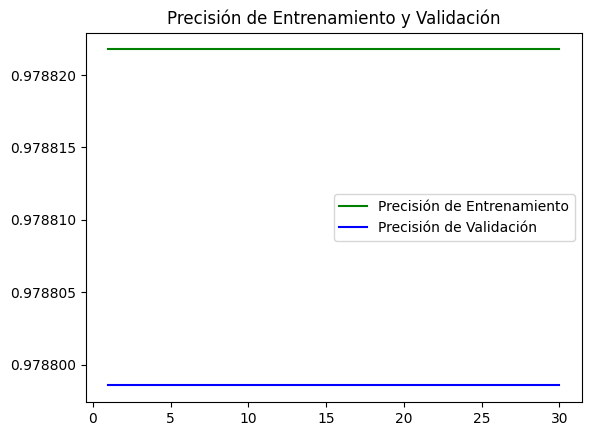

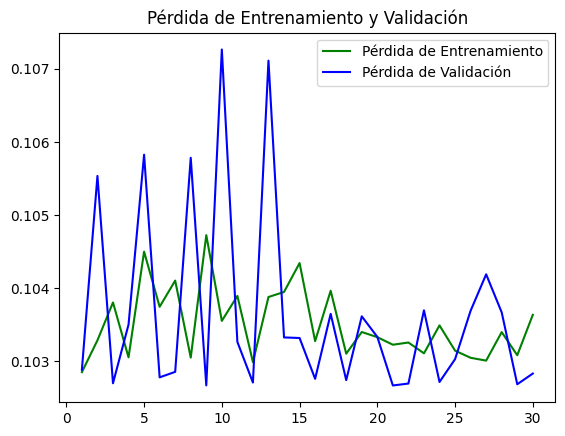

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "g", label="Precisión de Entrenamiento")
plt.plot(epochs, val_accuracy, "b", label="Precisión de Validación")
plt.title("Precisión de Entrenamiento y Validación")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "g", label="Pérdida de Entrenamiento")
plt.plot(epochs, val_loss, "b", label="Pérdida de Validación")
plt.title("Pérdida de Entrenamiento y Validación")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# generar predicciones en el conjunto de prueba
y_pred = model.predict_generator(generador_test)

# convertir las predicciones en etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)

# obtener las etiquetas reales
y_true = generador_test.classes

# calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)

<ipython-input-31-0e3b5b805a63>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(generador_test)


[[8032    0]
 [ 173    0]]


**CURVA ROC**

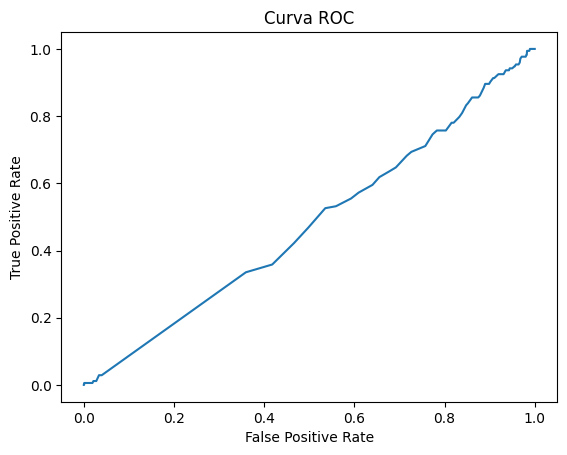

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Grafica la curva ROC
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()


Añadir dropout

# Compensar clases

In [ ]:
df_1 = df.loc[df['cancer']=='1']
df_0 = df.loc[df['cancer']=='0']
print(len(df_1))
print(len(df_0))

1158
53548


In [ ]:
df_0_mezclado = df_0.sample(frac=1, random_state=42).reset_index(drop=True)
df_0_mezclado = df_0_mezclado[:len(df_1)]

In [ ]:
len(df_0_mezclado)

1158

In [ ]:
df_concatenado = pd.concat([df_1, df_0_mezclado])
len(df_concatenado)

2316

# GENERADORES (compensando clases)

In [ ]:
df_concatenado['cancer'] = df_concatenado['cancer'].astype(str)

In [ ]:
# crear un objeto ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# crear generador de imágenes y etiquetas
generador = datagen.flow_from_dataframe(
    dataframe=df_concatenado,                           # dataframe con las etiquetas
    directory="/content/train",             # carpeta con las imágenes
    x_col="image_zip",                      # columna del dataframe con los nombres de las imágenes
    y_col="cancer",                         # columna del dataframe con las etiquetas
    target_size=(180, 180),                 # tamaño de las imágenes
    class_mode="binary",                    # tipo de etiquetas
    batch_size= 512,                        # tamaño del lote (batch)
    smart_resize = True
)



Found 1641 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 675 invalid image filename(s) in x_col="image_zip". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
from collections import Counter

# Obtener las etiquetas de las imágenes
labels = generador.classes

# Contar la cantidad de imágenes por clase
num_images_per_class = Counter(labels)

# Imprimir la cantidad de imágenes por clase
for class_name, count in num_images_per_class.items():
    print(f"Clase '{class_name}': {count} imágenes")



Clase '1': 811 imágenes
Clase '0': 830 imágenes


(180, 180, 3)


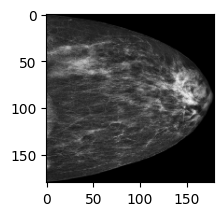

In [ ]:
import matplotlib.pyplot as plt
# Obtener un lote de imágenes del generador
x_batch, y_batch = generador.next()
# Acceder a la primera imagen del lote
image = x_batch[0]
# Visualizar la imagen
plt.subplot(2,2,2)
plt.imshow(image)
print(image.shape)
plt.show()


In [ ]:
# crear un objeto ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# crear generador de imágenes y etiquetas
generador_val = datagen.flow_from_dataframe(
    dataframe=df_concatenado,                           # dataframe con las etiquetas
    directory="/content/val",               # carpeta con las imágenes
    x_col="image_zip",                      # columna del dataframe con los nombres de las imágenes
    y_col="cancer",                         # columna del dataframe con las etiquetas
    target_size=(180, 180),                 # tamaño de las imágenes
    class_mode="binary",                    # tipo de etiquetas
    batch_size= 512,                        # tamaño del lote (batch)
    smart_resize = True
)

Found 340 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1976 invalid image filename(s) in x_col="image_zip". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
from collections import Counter

# Obtener las etiquetas de las imágenes
labels = generador_val.classes

# Contar la cantidad de imágenes por clase
num_images_per_class = Counter(labels)

# Imprimir la cantidad de imágenes por clase
for class_name, count in num_images_per_class.items():
    print(f"Clase '{class_name}': {count} imágenes")


Clase '1': 174 imágenes
Clase '0': 166 imágenes


In [ ]:
# crear un objeto ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# crear generador de imágenes y etiquetas
generador_test = datagen.flow_from_dataframe(
    dataframe=df_concatenado,                           # dataframe con las etiquetas
    directory="/content/test",             # carpeta con las imágenes
    x_col="image_zip",                      # columna del dataframe con los nombres de las imágenes
    y_col="cancer",                         # columna del dataframe con las etiquetas
    target_size=(180, 180),                 # tamaño de las imágenes
    class_mode="binary",                    # tipo de etiquetas
    batch_size= 256,                        # tamaño del lote (batch)
    smart_resize = True
)


Found 357 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1959 invalid image filename(s) in x_col="image_zip". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
from collections import Counter

# Obtener las etiquetas de las imágenes
labels = generador_test.classes

# Contar la cantidad de imágenes por clase
num_images_per_class = Counter(labels)

# Imprimir la cantidad de imágenes por clase
for class_name, count in num_images_per_class.items():
    print(f"Clase '{class_name}': {count} imágenes")


Clase '1': 173 imágenes
Clase '0': 184 imágenes


# MODELO BASICO CNN

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# El modelo espera imágenes RGB de tamaño 180 × 180
inputs = keras.Input(shape=(180, 180, 3))
# Reescala las entradas al rango [0, 1] dividiéndolas por 255
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 484416)            0         
                                                           

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        # Ruta específica donde guardar el fichero
        filepath="convnet_from_scratch.keras",
        # Las dos líneas siguientes, le dice al callback que solo guarde un 
        # nuevo archivo (sobrescribiendo cualquier anterior) cuando el valor 
        # actual de la métrica val_loss sea menor que en cualquier momento 
        # anterior durante el entrenamiento.
        save_best_only=True,
        monitor="val_loss")
]

In [ ]:
history = model.fit(
    generador,
    epochs=30,
    batch_size= 32,
    validation_data=generador_val
   # callbacks=callbacks
   )

Epoch 1/30
4/4 [==============================] - 9s 2s/step - loss: 0.6985 - accuracy: 0.5113 - val_loss: 0.6963 - val_accuracy: 0.4882
Epoch 2/30
4/4 [==============================] - 6s 2s/step - loss: 0.6960 - accuracy: 0.5058 - val_loss: 0.6931 - val_accuracy: 0.4882
Epoch 3/30
4/4 [==============================] - 6s 2s/step - loss: 0.6931 - accuracy: 0.4979 - val_loss: 0.6931 - val_accuracy: 0.4882
Epoch 4/30
4/4 [==============================] - 6s 2s/step - loss: 0.6931 - accuracy: 0.5058 - val_loss: 0.6931 - val_accuracy: 0.4882
Epoch 5/30
4/4 [==============================] - 6s 2s/step - loss: 0.6931 - accuracy: 0.5058 - val_loss: 0.6932 - val_accuracy: 0.4882
Epoch 6/30
4/4 [==============================] - 6s 1s/step - loss: 0.6931 - accuracy: 0.5058 - val_loss: 0.6932 - val_accuracy: 0.4882
Epoch 7/30
4/4 [==============================] - 6s 2s/step - loss: 0.6931 - accuracy: 0.5058 - val_loss: 0.6932 - val_accuracy: 0.4882
Epoch 8/30
4/4 [=========================

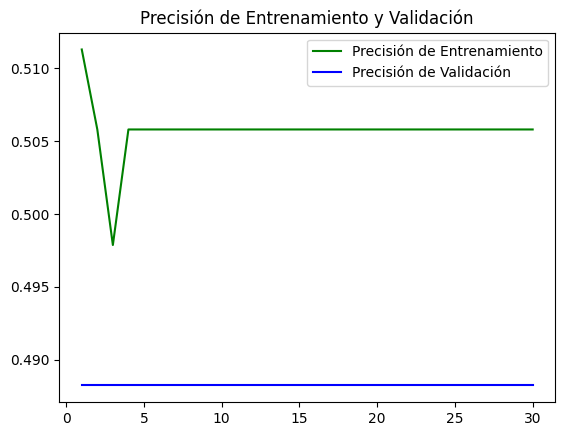

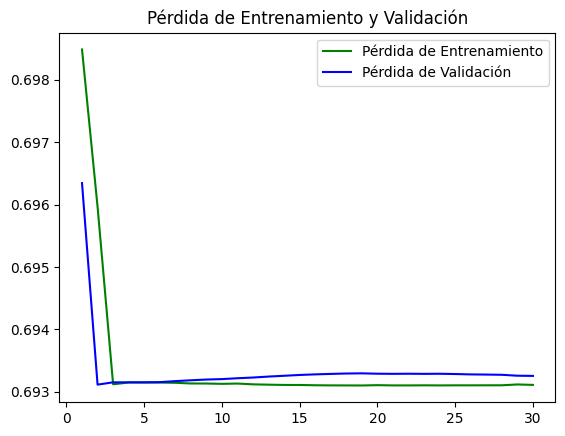

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "g", label="Precisión de Entrenamiento")
plt.plot(epochs, val_accuracy, "b", label="Precisión de Validación")
plt.title("Precisión de Entrenamiento y Validación")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "g", label="Pérdida de Entrenamiento")
plt.plot(epochs, val_loss, "b", label="Pérdida de Validación")
plt.title("Pérdida de Entrenamiento y Validación")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# generar predicciones en el conjunto de prueba
y_pred = model.predict_generator(generador_test)

# convertir las predicciones en etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)

# obtener las etiquetas reales
y_true = generador_test.classes

# calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)

<ipython-input-42-0e3b5b805a63>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(generador_test)


[[184   0]
 [173   0]]


**CURVA ROC**

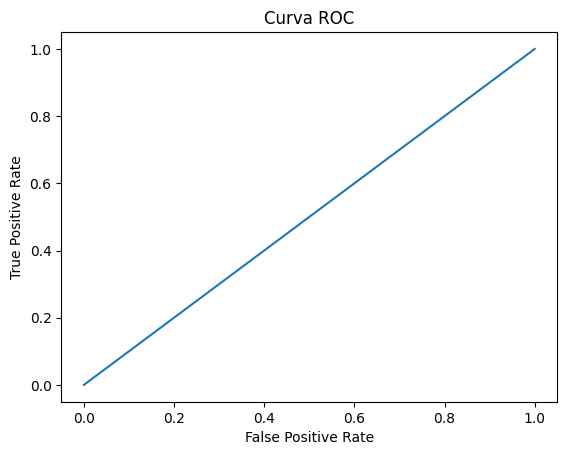

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Grafica la curva ROC
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import precision_score



# Definir el rango de umbrales y el incremento
umbral_inicio = 0
umbral_fin = 1
incremento = 0.01

# Inicializar las listas para almacenar los umbrales y las precisiones
umbrales = []
precisiones = []

# Probar diferentes umbrales y calcular la precisión para cada uno
for umbral in np.arange(umbral_inicio, umbral_fin + incremento, incremento):
    y_pred_binario = (y_pred >= umbral).astype(int)
    precision = precision_score(y_true, y_pred_binario)
    
    umbrales.append(umbral)
    precisiones.append(precision)

# Imprimir los umbrales y las precisiones correspondientes
for umbral, precision in zip(umbrales, precisiones):
    print(f"Umbral: {umbral:.2f} - Precisión: {precision:.2f}")


Umbral: 0.00 - Precisión: 0.48
Umbral: 0.01 - Precisión: 0.48
Umbral: 0.02 - Precisión: 0.48
Umbral: 0.03 - Precisión: 0.48
Umbral: 0.04 - Precisión: 0.48
Umbral: 0.05 - Precisión: 0.48
Umbral: 0.06 - Precisión: 0.48
Umbral: 0.07 - Precisión: 0.48
Umbral: 0.08 - Precisión: 0.48
Umbral: 0.09 - Precisión: 0.48
Umbral: 0.10 - Precisión: 0.48
Umbral: 0.11 - Precisión: 0.48
Umbral: 0.12 - Precisión: 0.48
Umbral: 0.13 - Precisión: 0.48
Umbral: 0.14 - Precisión: 0.48
Umbral: 0.15 - Precisión: 0.48
Umbral: 0.16 - Precisión: 0.48
Umbral: 0.17 - Precisión: 0.48
Umbral: 0.18 - Precisión: 0.48
Umbral: 0.19 - Precisión: 0.48
Umbral: 0.20 - Precisión: 0.48
Umbral: 0.21 - Precisión: 0.48
Umbral: 0.22 - Precisión: 0.48
Umbral: 0.23 - Precisión: 0.48
Umbral: 0.24 - Precisión: 0.48
Umbral: 0.25 - Precisión: 0.48
Umbral: 0.26 - Precisión: 0.48
Umbral: 0.27 - Precisión: 0.48
Umbral: 0.28 - Precisión: 0.48
Umbral: 0.29 - Precisión: 0.48
Umbral: 0.30 - Precisión: 0.48
Umbral: 0.31 - Precisión: 0.48
Umbral: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

In [ ]:
print(max(precisiones))
#Umbral: 0.48 - Precisión: 0.49

0.484593837535014


In [ ]:
#aplicamos umbral
import numpy as np


# Obtener las predicciones continuas del modelo
predicciones_continuas = model.predict(generador_test)

# Aplicar el umbral
umbral = 0.49
predicciones_binarias = (predicciones_continuas >= umbral).astype(np.int)

2/2 [==============================] - 1s 302ms/step


<ipython-input-46-d837e1d32a2e>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predicciones_binarias = (predicciones_continuas >= umbral).astype(np.int)


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# obtener las etiquetas reales
y_true = generador_test.classes

# calcular la matriz de confusión
cm = confusion_matrix(y_true, predicciones_binarias)
print(cm)

[[  0 184]
 [  0 173]]


COMPENSACIÓN CLASES + UMBRAL